In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Carregar el dataset
file_path = "Depression_Student_Dataset.csv" 
data = pd.read_csv(file_path)
display(data.head())

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [38]:
# Comprovar valors nuls
missing_values = data.isnull().sum().reset_index()
missing_values.columns = ['Columna', 'Nulls']
display(missing_values)

,Columna,Nulls
0,Gender,0
1,Age,0
2,Academic Pressure,0
3,Study Satisfaction,0
4,Sleep Duration,0
5,Dietary Habits,0
6,Have you ever had suicidal thoughts ?,0
7,Study Hours,0
8,Financial Stress,0
9,Family History of Mental Illness,0


In [40]:
# Comprovar duplicats i eliminar-los
print("Duplicats abans d'eliminar:")
print(data.duplicated().sum())
data = data.drop_duplicates()
print("Duplicats després d'eliminar:")
print(data.duplicated().sum())

Duplicats abans d'eliminar:
0
Duplicats després d'eliminar:
0


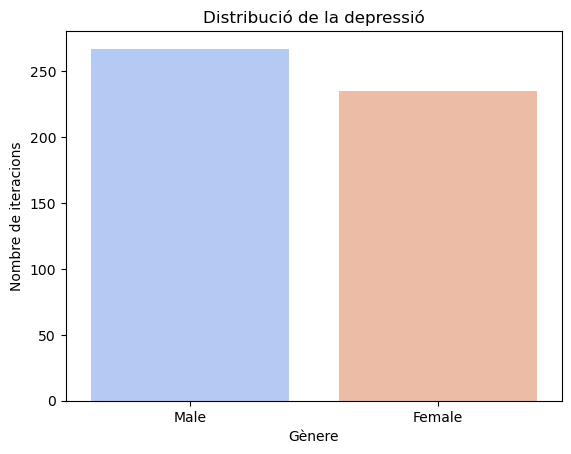

In [42]:
# Visualització de dades: distribució de la depressió
sns.countplot(x='Gender', data=data, hue='Gender', palette='coolwarm')
plt.title('Distribució de la depressió')
plt.xlabel('Gènere')
plt.ylabel('Nombre de iteracions')
plt.show()

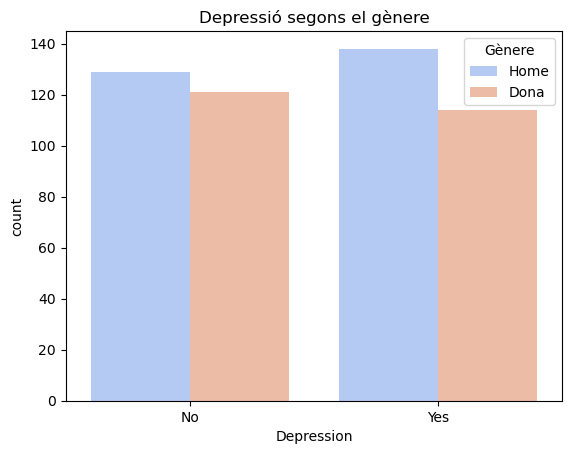

In [44]:
sns.countplot(x='Depression', hue='Gender', data=data, palette='coolwarm')
plt.title('Depressió segons el gènere')
plt.legend(title='Gènere', labels=['Home', 'Dona'])  # Actualitzar etiquetes de la llegenda
plt.show()

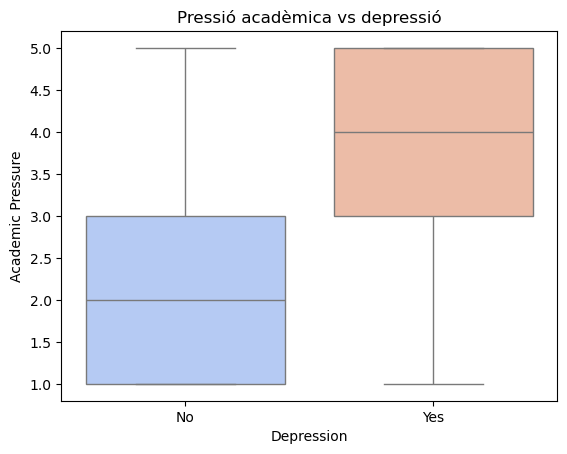

In [46]:
# Analitzar la relació entre la pressió acadèmica i la depressió
sns.boxplot(x='Depression', y='Academic Pressure', hue='Depression', data=data, palette='coolwarm')
plt.title('Pressió acadèmica vs depressió')
plt.show()

# La pressio acadèmica és un valor entre el 0 i el 5
# Academic Pressure measures the subjective stress related to academic demands.

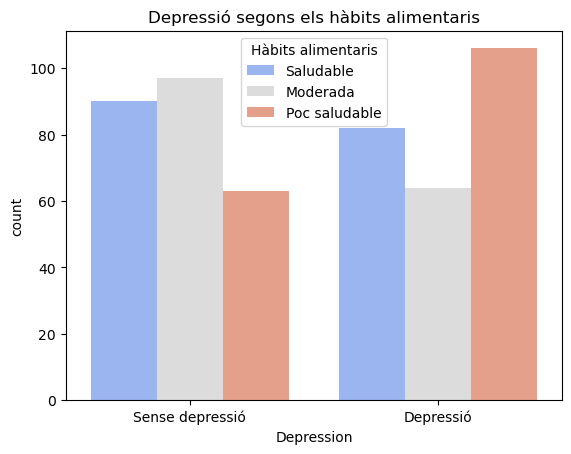

In [48]:
# Analitzar els hàbits alimentaris i la depressió
# Actualitzar les etiquetes dels hàbits alimentaris en el gràfic
sns.countplot(x='Depression', hue='Dietary Habits', data=data, palette='coolwarm')
plt.title('Depressió segons els hàbits alimentaris')
plt.xticks([0, 1], ['Sense depressió', 'Depressió'])  # Assegurar que l'eix de la depressió estigui etiquetat
plt.legend(title='Hàbits alimentaris', labels=['Saludable', 'Moderada', 'Poc saludable'])  # Ajustar les etiquetes de la llegenda
plt.show()

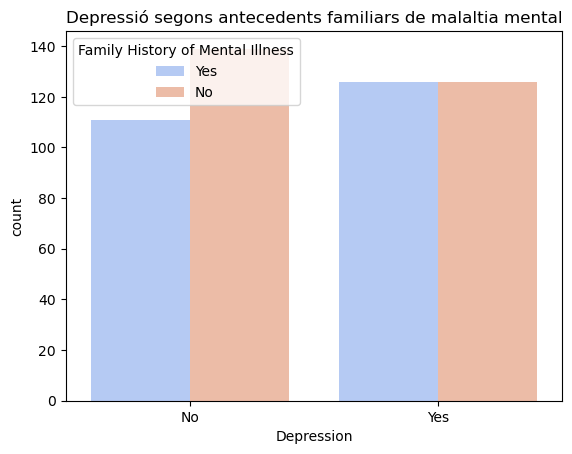

In [50]:
# Analitzar l'impacte dels antecedents familiars de malaltia mental en la depressió
sns.countplot(x='Depression', hue='Family History of Mental Illness', data=data, palette='coolwarm')
plt.title('Depressió segons antecedents familiars de malaltia mental')
plt.show()

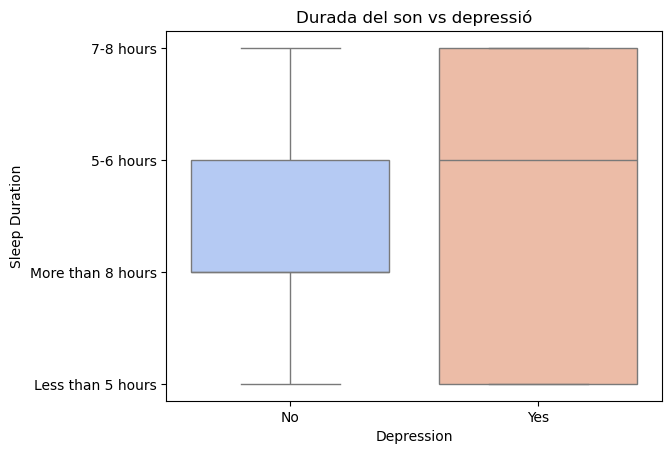

In [52]:
# Analitzar la durada del son i la depressió
sns.boxplot(x='Depression', y='Sleep Duration', hue='Depression', data=data, palette='coolwarm')
plt.title('Durada del son vs depressió')
plt.show()
## Afegir calculs mitja de son respecte a la depressio i no depressio.

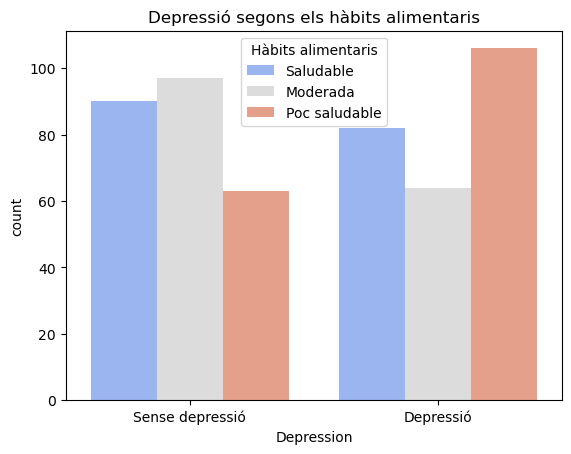

In [54]:
# Analitzar els hàbits alimentaris i la depressió
# Actualitzar les etiquetes dels hàbits alimentaris en el gràfic
sns.countplot(x='Depression', hue='Dietary Habits', data=data, palette='coolwarm')
plt.title('Depressió segons els hàbits alimentaris')
plt.xticks([0, 1], ['Sense depressió', 'Depressió'])  # Assegurar que l'eix de la depressió estigui etiquetat
plt.legend(title='Hàbits alimentaris', labels=['Saludable', 'Moderada', 'Poc saludable'])  # Ajustar les etiquetes de la llegenda
plt.show()

In [12]:
# Preprocessament
# Convertir el gènere a binari (0: Home, 1: Dona)
data['Gender'] = data['Gender'].map({'Male': False, 'Female': True})

# Convertir els hàbits alimentaris a binari (0: Poc saludable, 1: Saludable)
data['Dietary Habits'] = data['Dietary Habits'].map({'Unhealthy': 0, 'Healthy': 1, 'Moderate': 0.5})

# Convertir "Has tingut mai pensaments suïcides?" a binari (0: No, 1: Sí)
data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].map({'No': False, 'Yes': True})

# Convertir antecedents familiars de malaltia mental a binari (0: No, 1: Sí)
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].map({'No': False, 'Yes': True})

# Convertir depressió a binari (0: No, 1: Sí)
data['Depression'] = data['Depression'].map({'No': False, 'Yes': True})

# Convertir durada del son a categories numèriques
data['Sleep Duration'] = data['Sleep Duration'].map({
    'Less than 5 hours': 4,
    '5-6 hours': 5.5,
    '6-7 hours': 6.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9
})

# Verificar els noms de les columnes i gestionar dades mancants o no numèriques
numeric_columns = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration',
                   'Study Hours', 'Financial Stress']
# Assegurar-se que totes les columnes existeixen i són numèriques
for col in numeric_columns + ['Depression']:
    if col not in data.columns:
        print(f"La columna '{col}' no s'ha trobat en el conjunt de dades!")
    else:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Eliminar files amb valors perduts en les columnes seleccionades
filtered_data = data[numeric_columns + ['Depression']].dropna()

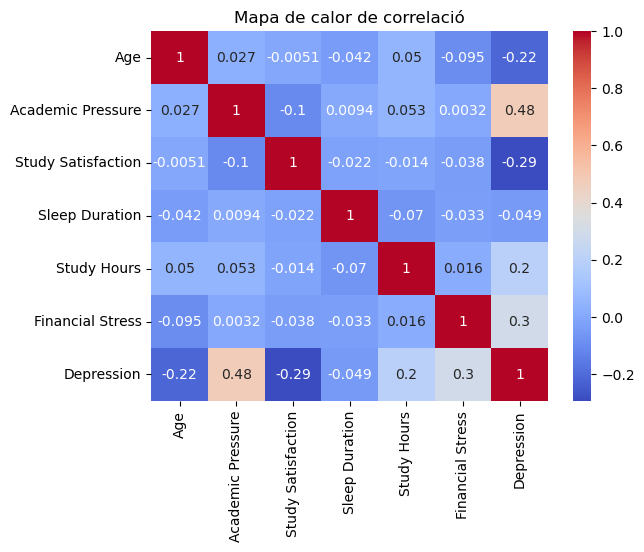

In [13]:
# Map de calor de correlació per analitzar les relacions entre variables numèriques
sns.heatmap(filtered_data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlació')
plt.show()